<b>DATA DOWNLOAD</b>

In [1]:
import os
import zipfile
import requests
import tarfile

In [19]:
directory = "C:/Users/Panda/ML/AReM"
download_path = "C:/Users/Panda/Downloads/AReM.zip"

In [20]:
def data_download(directory = directory,downloaded_file = downloaded_file,download_path = download_path):
   
    os.makedirs(directory)
    os.rename(download_path,directory+'{}'.format('.zip'))
    
    with zipfile.ZipFile(directory+'{}'.format('.zip'),'r') as data:
        data.extractall(directory)
        
    return "data downloaded successfully"
    

In [21]:
data_download()

'data downloaded successfully'

In [16]:
1. WAP to read folder name and make a label in the csv with folder name
2. Remove unneccesarry info in Automated way
3. No other algorithm must be used other than Logistic Regression
4. Try to utilize multiple solvers and make multiple models
5. Provide the best models
6. EDA and all must be done accordingly
Note: No manual approaches will be appreciated


SyntaxError: invalid syntax (<ipython-input-16-64aa33148089>, line 1)

<b>Data Frame creation of all the files</b>

In [1]:
from glob import glob
import pandas as pd
def dataFrames(path):
    files = glob(path)
    df = pd.concat((pd.read_csv(file,skiprows=4,error_bad_lines=False)for file in files),ignore_index=True)
    return df

In [2]:
df1 = dataFrames('AReM/bending1/dataset*')

C:\Users\Panda\Anaconda3\lib\site-packages\pandas\core\reshape\concat.py:348: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  objs = list(objs)


In [3]:
df2 = dataFrames('AReM/bending2/dataset*')
df3 = dataFrames('AReM/cycling/dataset*')

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [4]:
df4 = dataFrames('AReM/lying/dataset*')
df5 = dataFrames('AReM/sitting/dataset*')
df6 = dataFrames('AReM/standing/dataset*')
df7 = dataFrames('AReM/walking/dataset*')

In [5]:
df1['label'] = 'bending1'
df2['label'] = 'bending2'
df3['label'] = 'cycling'
df4['label'] = 'lying'
df5['label'] = 'sitting'
df6['label'] = 'standing'
df7['label'] = 'walking'

In [6]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=0)

In [7]:
df_final

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
7195,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


<b>EDA</b>

In [8]:
df_final.isnull().sum()

# Columns: time      0
avg_rss12          480
var_rss12          480
avg_rss13          480
var_rss13          480
avg_rss23          480
var_rss23          480
label                0
dtype: int64

In [9]:
df_final.dropna(axis=0)

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
7195,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [97]:
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression

import pickle
import numpy as np

In [81]:
report = ProfileReport(df_final)
report.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
corr_matrix = df_final.corr().round(2)

<AxesSubplot:>

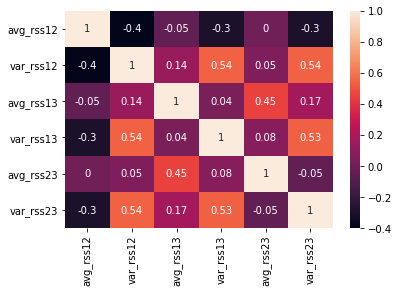

In [12]:
sns.heatmap(corr_matrix,annot =True)

<AxesSubplot:>

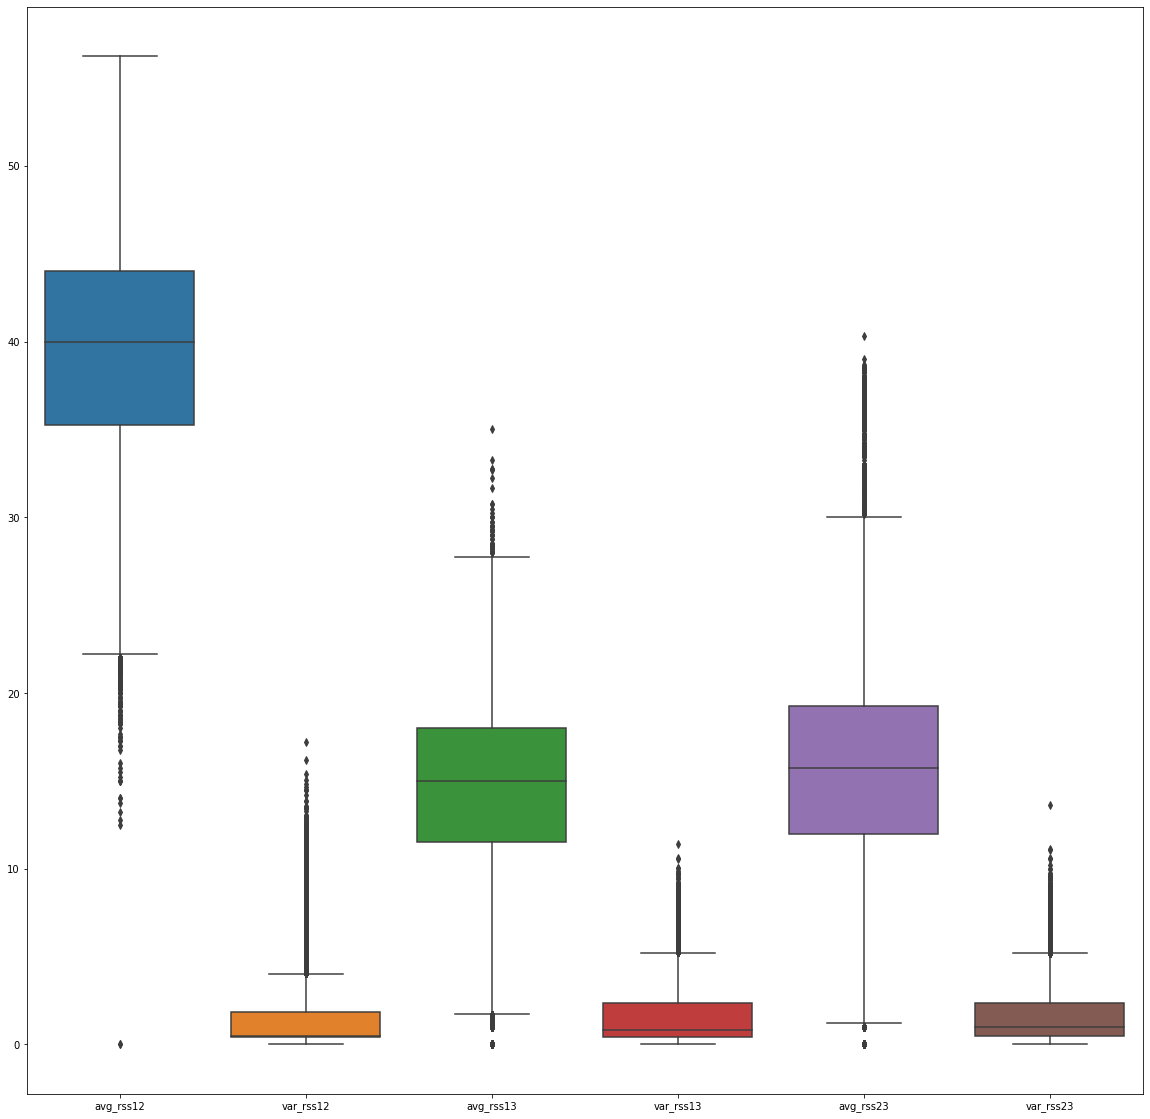

In [13]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_final,ax=ax)

In [14]:
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [15]:
coerce_df_columns_to_numeric(df_final,['# Columns: time','avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'])

In [16]:
df_final['avg_rss12'].dtypes

dtype('float64')

In [17]:
scaler = StandardScaler()
df_new_scaler = pd.DataFrame(scaler.fit_transform(df_final[['# Columns: time','avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13','avg_rss23', 'var_rss23']]),columns=['# Columns: time','avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13','avg_rss23', 'var_rss23'])

<AxesSubplot:>

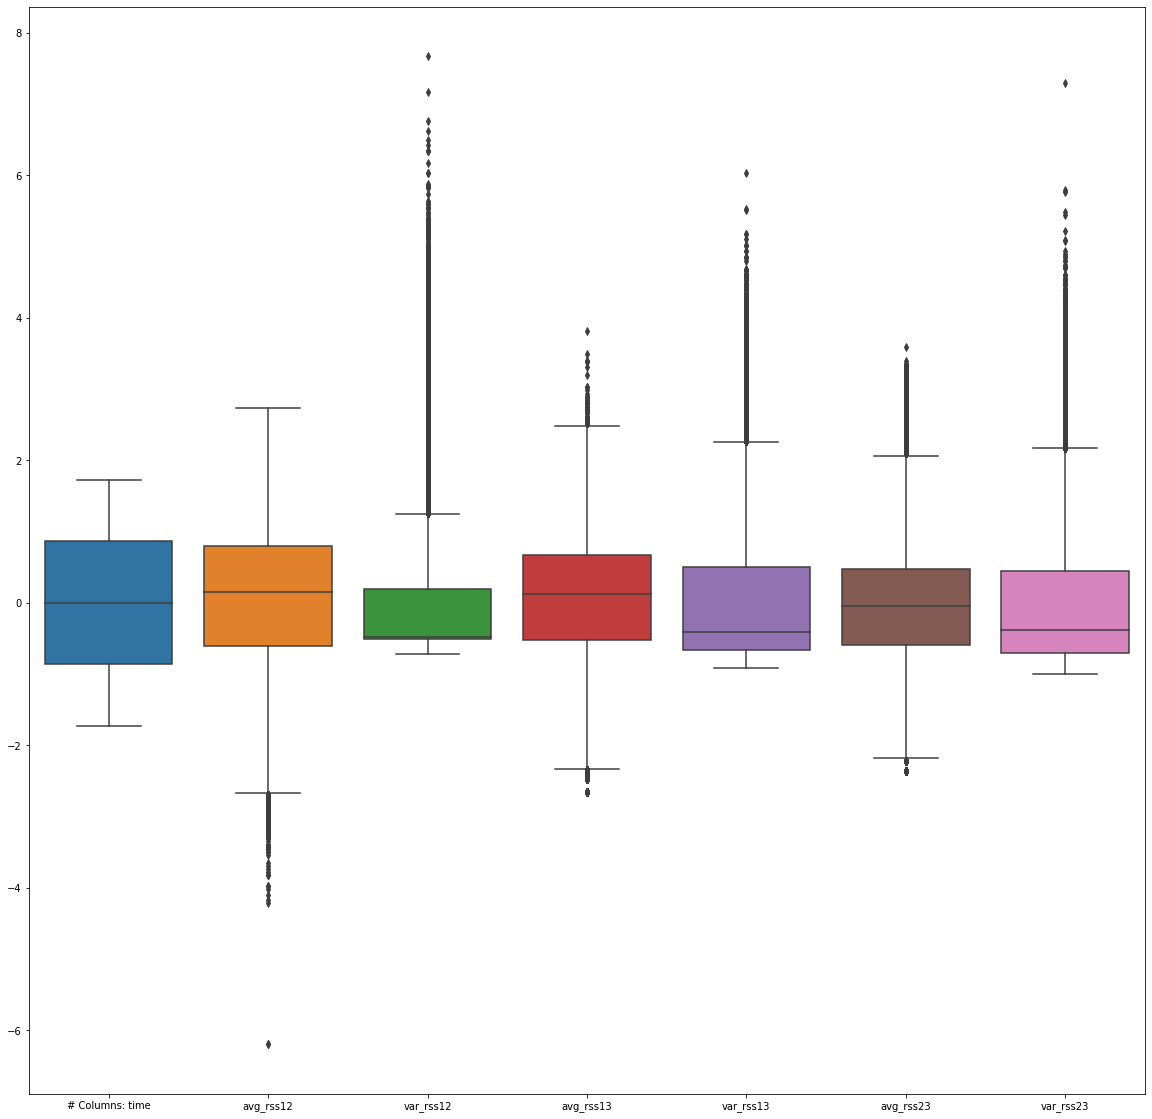

In [18]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scaler,ax=ax)

<b>outlier treatments</b>

In [21]:
max_thresh = df_final['avg_rss12'].quantile(0.999)
min_thresh = df_final['avg_rss12'].quantile(0.001)

In [22]:
df_new = df_final[(df_final['avg_rss12']<max_thresh) & (df_final['avg_rss12']>min_thresh )]

In [23]:
df_new

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0.0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250.0,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500.0,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750.0,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000.0,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
7195,118750.0,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000.0,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250.0,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500.0,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [24]:
df_new.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'label'],
      dtype='object')

In [25]:
max_thresh,min_thresh = df_new['var_rss12'].quantile([0.999,0.001])

In [26]:
df_new = df_new[(df_new['var_rss12']<max_thresh)&(df_new['var_rss12']>min_thresh)]

In [27]:
df_new

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0.0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250.0,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500.0,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750.0,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000.0,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
7195,118750.0,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000.0,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250.0,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500.0,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [28]:
max_thresh,min_thresh = df_new['avg_rss13'].quantile([0.999,0.001])

In [29]:
df_new = df_new[(df_new['avg_rss13']<max_thresh)&(df_new['avg_rss13']>min_thresh)]

In [30]:
df_new = df_new[(df_new['var_rss13']<max_thresh)&(df_new['var_rss13']>min_thresh)]

In [31]:
df_new

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0.0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
2,500.0,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750.0,39.50,0.50,23.00,0.71,33.00,0.00,bending1
10,2500.0,39.50,0.50,23.25,0.43,33.00,0.00,bending1
11,2750.0,39.50,0.50,23.50,0.50,32.75,0.43,bending1
...,...,...,...,...,...,...,...,...
7195,118750.0,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000.0,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250.0,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500.0,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [32]:
max_thresh,min_thresh = df_new['avg_rss23'].quantile([0.999,0.001])

In [33]:
df_new = df_new[(df_new['avg_rss23']<max_thresh)&(df_new['avg_rss23']>min_thresh)]

In [34]:
max_thresh,min_thresh = df_new['var_rss23'].quantile([0.999,0.001])

In [35]:
df_new = df_new[(df_new['var_rss23']<max_thresh)&(df_new['var_rss23']>min_thresh)]

In [36]:
df_new

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0.0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
11,2750.0,39.50,0.50,23.50,0.50,32.75,0.43,bending1
12,3000.0,39.50,0.50,23.75,0.43,32.50,0.50,bending1
27,6750.0,40.50,0.50,19.75,1.09,33.75,1.30,bending1
30,7500.0,41.00,1.00,20.75,0.43,33.75,1.30,bending1
...,...,...,...,...,...,...,...,...
7195,118750.0,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000.0,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250.0,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500.0,33.75,1.30,15.75,5.21,16.50,2.69,walking


<AxesSubplot:>

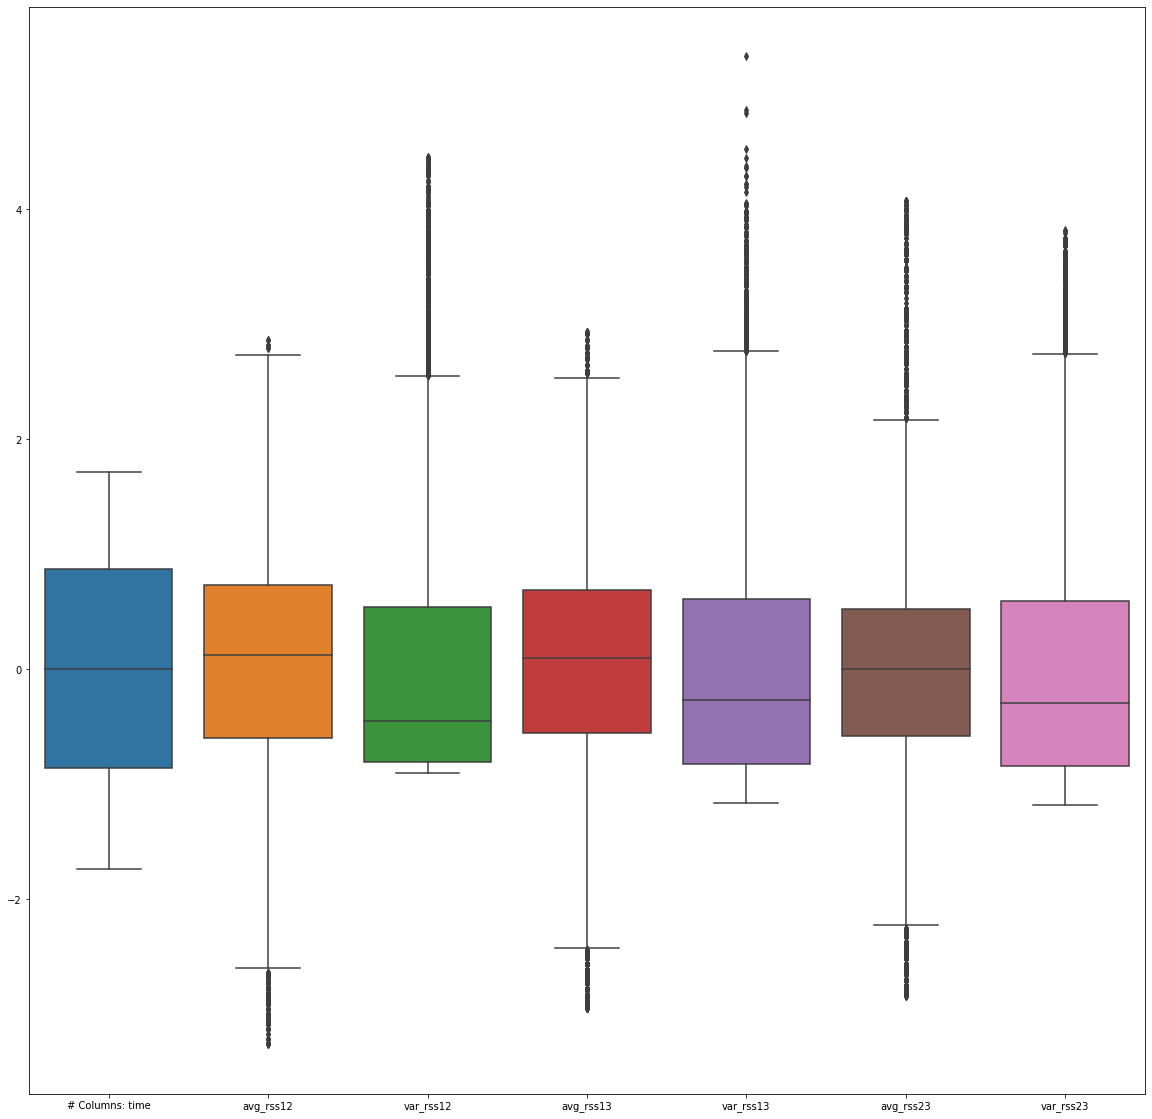

In [37]:
df_new_scaler = pd.DataFrame(scaler.fit_transform(df_new[['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']]),columns = ['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'])
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data= df_new_scaler,ax=ax)

In [38]:
df_new

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0.0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
11,2750.0,39.50,0.50,23.50,0.50,32.75,0.43,bending1
12,3000.0,39.50,0.50,23.75,0.43,32.50,0.50,bending1
27,6750.0,40.50,0.50,19.75,1.09,33.75,1.30,bending1
30,7500.0,41.00,1.00,20.75,0.43,33.75,1.30,bending1
...,...,...,...,...,...,...,...,...
7195,118750.0,31.50,1.66,12.50,3.20,14.25,4.44,walking
7196,119000.0,27.33,1.25,11.33,0.94,20.00,4.00,walking
7197,119250.0,37.80,7.68,14.20,2.48,17.25,0.83,walking
7198,119500.0,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [132]:
x = df_new[['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']]

In [133]:
y = df_new[['label']]
arr = scaler.fit_transform(x)


In [134]:
y[y['label']=='bending2']

,label
4,bending2
6,bending2
8,bending2
15,bending2
22,bending2
...,...
2859,bending2
2860,bending2
2863,bending2
2871,bending2


In [135]:
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]


In [136]:
vif_df['features'] = x.columns

In [137]:
vif_df

,vif,features
0,1.000752,# Columns: time
1,1.257322,avg_rss12
2,1.553733,var_rss12
3,1.231147,avg_rss13
4,1.398475,var_rss13
5,1.201987,avg_rss23
6,1.455581,var_rss23


In [138]:
x_train,x_test,y_train,y_test = train_test_split(arr , y, test_size = .20,random_state = 144)

In [92]:
log_lr = LogisticRegression(verbose=1)

In [93]:
log_lr.fit(x_train,y_train)

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [49]:
log_lr.predict([x_test[500]])

array(['lying'], dtype=object)

In [50]:
y_test.iloc[500]

label    lying
Name: 5050, dtype: object

In [51]:
y_pred = log_lr.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred)
df_final['label'].value_counts(sort=False).index[0:8]


Index(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'],
      dtype='object')

In [56]:
conf_matrix  = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = df_final['label'].value_counts(sort = False).index,
                 index =  df_final['label'].value_counts(sort = False).index)

In [57]:
conf_matrix

,bending1,bending2,cycling,lying,sitting,standing,walking
bending1,175,0,11,0,20,10,0
bending2,10,102,28,27,6,2,7
cycling,0,11,830,0,15,18,459
lying,0,4,4,410,13,15,3
sitting,31,16,84,103,113,252,4
standing,1,0,34,35,80,462,6
walking,0,8,369,2,1,1,1014


In [78]:
def performance(confusion_matrix):
    for i in range(conf_matrix.shape[0]):
        TP = cm.iloc[i,i]
        FP = cm.iloc[:,i].sum() - TP
        FN = cm.iloc[i,:].sum() - TP 
        TN = cm.sum().sum()-TP-FP-FN    
        accuracy = (TP+TN)/conf_matrix.sum().sum()
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        F1_score = (2*precision*recall)/(precision+recall)
        print(conf_matrix.index[i]+"\n"+"ACCURACY " +str(accuracy) +",PRECISION "+str(precision)+",RECALL "+str(recall)+",F1_SCORE "+str(F1_score))



In [79]:
performance(confusion_matrix)

bending1
ACCURACY 0.9826939115929941,PRECISION 0.8064516129032258,RECALL 0.8101851851851852,F1_SCORE 0.8083140877598153
bending2
ACCURACY 0.9751876563803169,PRECISION 0.723404255319149,RECALL 0.5604395604395604,F1_SCORE 0.631578947368421
cycling
ACCURACY 0.7846121768140116,PRECISION 0.6102941176470589,RECALL 0.622655663915979,F1_SCORE 0.6164129223913851
lying
ACCURACY 0.9570475396163469,PRECISION 0.7105719237435009,RECALL 0.9131403118040089,F1_SCORE 0.7992202729044834
sitting
ACCURACY 0.8696830692243537,PRECISION 0.45564516129032256,RECALL 0.18739635157545606,F1_SCORE 0.2655699177438308
standing
ACCURACY 0.9053377814845704,PRECISION 0.6078947368421053,RECALL 0.7475728155339806,F1_SCORE 0.6705370101596517
walking
ACCURACY 0.8206839032527106,PRECISION 0.6791694574681849,RECALL 0.7268817204301076,F1_SCORE 0.7022160664819944


In [171]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred,output_dict = True)

{'bending1': {'precision': 0.8027522935779816,
  'recall': 0.8101851851851852,
  'f1-score': 0.8064516129032256,
  'support': 216},
 'bending2': {'precision': 0.723404255319149,
  'recall': 0.5604395604395604,
  'f1-score': 0.631578947368421,
  'support': 182},
 'cycling': {'precision': 0.6102941176470589,
  'recall': 0.622655663915979,
  'f1-score': 0.6164129223913851,
  'support': 1333},
 'lying': {'precision': 0.711304347826087,
  'recall': 0.910913140311804,
  'f1-score': 0.798828125,
  'support': 449},
 'sitting': {'precision': 0.46184738955823296,
  'recall': 0.19071310116086235,
  'f1-score': 0.2699530516431925,
  'support': 603},
 'standing': {'precision': 0.6078947368421053,
  'recall': 0.7475728155339806,
  'f1-score': 0.6705370101596517,
  'support': 618},
 'walking': {'precision': 0.6791694574681849,
  'recall': 0.7268817204301076,
  'f1-score': 0.7022160664819944,
  'support': 1395},
 'accuracy': 0.6478315262718932,
 'macro avg': {'precision': 0.6566666568912571,
  'recall

<b>solver : saga</b>


In [128]:
log_lr = LogisticRegression(verbose=1,solver = 'saga')

In [139]:
log_lr.fit(x_train,y_train)

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 18 epochs took 0 seconds
convergence after 15 epochs took 1 seconds
convergence after 17 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [140]:
y_pred = log_lr.predict(x_test)

In [155]:
conf_matrix  = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = df_final['label'].value_counts(sort = False).index,
                 index =  df_final['label'].value_counts(sort = False).index)

In [163]:
def performance(confusion_matrix):
    for i in range(conf_matrix.shape[0]):
        TP = cm.iloc[i,i]
        FP = cm.iloc[:,i].sum() - TP
        FN = cm.iloc[i,:].sum() - TP 
        TN = cm.sum().sum()-TP-FP-FN    
        accuracy = (TP+TN)/conf_matrix.sum().sum()
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        F1_score = (2*precision*recall)/(precision+recall)
        print(conf_matrix.index[i]+"\n"+"ACCURACY " +str(accuracy) +",PRECISION "+str(precision)+",RECALL "+str(recall)+",F1_SCORE "+str(F1_score))


In [157]:
performance(conf_matrix)

bending1
ACCURACY 0.9826939115929941,PRECISION 0.8064516129032258,RECALL 0.8101851851851852,F1_SCORE 0.8083140877598153
bending2
ACCURACY 0.9751876563803169,PRECISION 0.723404255319149,RECALL 0.5604395604395604,F1_SCORE 0.631578947368421
cycling
ACCURACY 0.7846121768140116,PRECISION 0.6102941176470589,RECALL 0.622655663915979,F1_SCORE 0.6164129223913851
lying
ACCURACY 0.9570475396163469,PRECISION 0.7105719237435009,RECALL 0.9131403118040089,F1_SCORE 0.7992202729044834
sitting
ACCURACY 0.8696830692243537,PRECISION 0.45564516129032256,RECALL 0.18739635157545606,F1_SCORE 0.2655699177438308
standing
ACCURACY 0.9053377814845704,PRECISION 0.6078947368421053,RECALL 0.7475728155339806,F1_SCORE 0.6705370101596517
walking
ACCURACY 0.8206839032527106,PRECISION 0.6791694574681849,RECALL 0.7268817204301076,F1_SCORE 0.7022160664819944


In [146]:
classification_report(y_test,y_pred,output_dict = True)

{'bending1': {'precision': 0.8027522935779816,
  'recall': 0.8101851851851852,
  'f1-score': 0.8064516129032256,
  'support': 216},
 'bending2': {'precision': 0.723404255319149,
  'recall': 0.5604395604395604,
  'f1-score': 0.631578947368421,
  'support': 182},
 'cycling': {'precision': 0.6102941176470589,
  'recall': 0.622655663915979,
  'f1-score': 0.6164129223913851,
  'support': 1333},
 'lying': {'precision': 0.711304347826087,
  'recall': 0.910913140311804,
  'f1-score': 0.798828125,
  'support': 449},
 'sitting': {'precision': 0.46184738955823296,
  'recall': 0.19071310116086235,
  'f1-score': 0.2699530516431925,
  'support': 603},
 'standing': {'precision': 0.6078947368421053,
  'recall': 0.7475728155339806,
  'f1-score': 0.6705370101596517,
  'support': 618},
 'walking': {'precision': 0.6791694574681849,
  'recall': 0.7268817204301076,
  'f1-score': 0.7022160664819944,
  'support': 1395},
 'accuracy': 0.6478315262718932,
 'macro avg': {'precision': 0.6566666568912571,
  'recall

In [169]:
accuracy_score(y_test,y_pred,normalize=True)

0.6478315262718932

<b> solver : newton-cg </b>

In [147]:
log_lr = LogisticRegression(verbose=1,solver = 'newton-cg')

In [148]:
log_lr.fit(x_train,y_train)

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [149]:
y_pred = log_lr.predict(x_test)

In [151]:
conf_matrix  = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = df_final['label'].value_counts(sort = False).index)


In [158]:
performance(conf_matrix)

bending1
ACCURACY 0.9826939115929941,PRECISION 0.8064516129032258,RECALL 0.8101851851851852,F1_SCORE 0.8083140877598153
bending2
ACCURACY 0.9751876563803169,PRECISION 0.723404255319149,RECALL 0.5604395604395604,F1_SCORE 0.631578947368421
cycling
ACCURACY 0.7846121768140116,PRECISION 0.6102941176470589,RECALL 0.622655663915979,F1_SCORE 0.6164129223913851
lying
ACCURACY 0.9570475396163469,PRECISION 0.7105719237435009,RECALL 0.9131403118040089,F1_SCORE 0.7992202729044834
sitting
ACCURACY 0.8696830692243537,PRECISION 0.45564516129032256,RECALL 0.18739635157545606,F1_SCORE 0.2655699177438308
standing
ACCURACY 0.9053377814845704,PRECISION 0.6078947368421053,RECALL 0.7475728155339806,F1_SCORE 0.6705370101596517
walking
ACCURACY 0.8206839032527106,PRECISION 0.6791694574681849,RECALL 0.7268817204301076,F1_SCORE 0.7022160664819944


<b>solver : sag</b>

In [173]:
log_lr = LogisticRegression(verbose=1,solver = 'sag')

In [174]:
log_lr.fit(x_train,y_train)

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 24 epochs took 1 seconds
convergence after 22 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 26 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=1,
                   warm_start=False)

In [175]:
y_pred = log_lr.predict(x_test)

In [176]:
conf_matrix  = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = df_final['label'].value_counts(sort = False).index,
                 index =  df_final['label'].value_counts(sort = False).index)

In [177]:
performance(conf_matrix)

bending1
ACCURACY 0.9826939115929941,PRECISION 0.8064516129032258,RECALL 0.8101851851851852,F1_SCORE 0.8083140877598153
bending2
ACCURACY 0.9751876563803169,PRECISION 0.723404255319149,RECALL 0.5604395604395604,F1_SCORE 0.631578947368421
cycling
ACCURACY 0.7846121768140116,PRECISION 0.6102941176470589,RECALL 0.622655663915979,F1_SCORE 0.6164129223913851
lying
ACCURACY 0.9570475396163469,PRECISION 0.7105719237435009,RECALL 0.9131403118040089,F1_SCORE 0.7992202729044834
sitting
ACCURACY 0.8696830692243537,PRECISION 0.45564516129032256,RECALL 0.18739635157545606,F1_SCORE 0.2655699177438308
standing
ACCURACY 0.9053377814845704,PRECISION 0.6078947368421053,RECALL 0.7475728155339806,F1_SCORE 0.6705370101596517
walking
ACCURACY 0.8206839032527106,PRECISION 0.6791694574681849,RECALL 0.7268817204301076,F1_SCORE 0.7022160664819944


In [168]:
accuracy_score(y_test,y_pred,normalize=True)

0.6478315262718932

<b>solver :lbfgs </b>

In [179]:
log_lr = LogisticRegression(verbose=1,solver = 'lbfgs')

In [180]:
log_lr.fit(x_train,y_train)

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [181]:
y_pred = log_lr.predict(x_test)

In [182]:
conf_matrix  = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = df_final['label'].value_counts(sort = False).index,
                 index =  df_final['label'].value_counts(sort = False).index)

In [183]:
performance(conf_matrix)

bending1
ACCURACY 0.9826939115929941,PRECISION 0.8064516129032258,RECALL 0.8101851851851852,F1_SCORE 0.8083140877598153
bending2
ACCURACY 0.9751876563803169,PRECISION 0.723404255319149,RECALL 0.5604395604395604,F1_SCORE 0.631578947368421
cycling
ACCURACY 0.7846121768140116,PRECISION 0.6102941176470589,RECALL 0.622655663915979,F1_SCORE 0.6164129223913851
lying
ACCURACY 0.9570475396163469,PRECISION 0.7105719237435009,RECALL 0.9131403118040089,F1_SCORE 0.7992202729044834
sitting
ACCURACY 0.8696830692243537,PRECISION 0.45564516129032256,RECALL 0.18739635157545606,F1_SCORE 0.2655699177438308
standing
ACCURACY 0.9053377814845704,PRECISION 0.6078947368421053,RECALL 0.7475728155339806,F1_SCORE 0.6705370101596517
walking
ACCURACY 0.8206839032527106,PRECISION 0.6791694574681849,RECALL 0.7268817204301076,F1_SCORE 0.7022160664819944


In [184]:
accuracy_score(y_test,y_pred)

0.6478315262718932